# Assignment 10.2

In this assignment, students will be using the K-nearest neighbors algorithm to predict
how many points NBA players scored in the 2013-2014 season.<br>
A look at the data<br>
Before we dive into the algorithm, letâ€TMs take a look at our data. Each row in the data
contains information on how a player performed in the 2013-2014 NBA season.<br>
Download 'nba_2013.csv' file from this link:<br>
https://www.dropbox.com/s/b3nv38jjo5dxcl6/nba_2013.csv?dl=0<br>
Here are some selected columns from the data:<br>
player - name of the player<br>
pos - the position of the player<br>
g - number of games the player was in<br>
gs - number of games the player started<br>
pts - total points the player scored<br>
There are many more columns in the data, mostly containing information about average
player game performance over the course of the season. See this site for an explanation
of the rest of them.<br>
We can read our dataset in and figure out which columns are present:<br>
import pandas<br>
with open("nba_2013.csv", 'r') as csvfile:<br>
nba = pandas.read_csv(csvfile)<br>

<h2>Solution</h2>

<h3>Data Preparation</h3>

In [12]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

with open("nba_2013.csv", 'r') as csvfile:
    nba = pd.read_csv(csvfile)
    
columns_to_drop = ['player','pts','pos','bref_team_id','season','season_end']

y = nba['pts'].values
X = nba.drop(columns=columns_to_drop,axis=1)
for col in X.columns:
    X[col] = X[col].fillna(np.mean(X[col]))

#normalize data
scaler = StandardScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), columns=X.columns)
print(X.head(3))

        age         g        gs        mp        fg       fga       fg.  \
0 -0.836776  0.385287 -0.863104 -0.435541 -0.739170 -0.769305  0.320886   
1 -1.552101  1.096851 -0.188059 -0.045058 -0.581877 -0.649891  0.676707   
2  0.116990 -0.010027 -0.458077 -0.308355 -0.290593 -0.405636  0.849534   

        x3p      x3pa          x3p.    ...          fta       ft.       orb  \
0 -0.701011 -0.717354 -1.262752e-01    ...    -0.515944 -0.398508  0.260962   
1 -0.779747 -0.830465  3.800415e-16    ...     0.117140 -0.902879  1.389328   
2 -0.779747 -0.830465  3.800415e-16    ...    -0.012528 -0.532581  0.744547   

        drb       trb       ast       stl       blk       tov        pf  
0 -0.129597 -0.013130 -0.645891 -0.468543  0.061474 -0.668345  0.226751  
1  0.187214  0.566441 -0.531285  0.020702  1.066555 -0.013774  1.365358  
2  0.283635  0.436537 -0.569487 -0.439764  0.385694 -0.524659  0.029955  

[3 rows x 25 columns]


<h3>Data Visualization</h3>

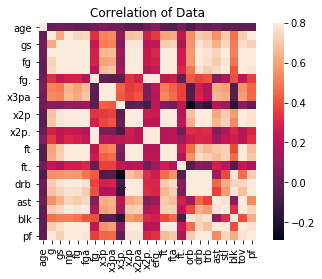

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
data_corr = X.corr()
sns.heatmap(data_corr , vmax=.8, square=True)
plt.title("Correlation of Data")
plt.show()

<h4>Points vs. Features</h4>

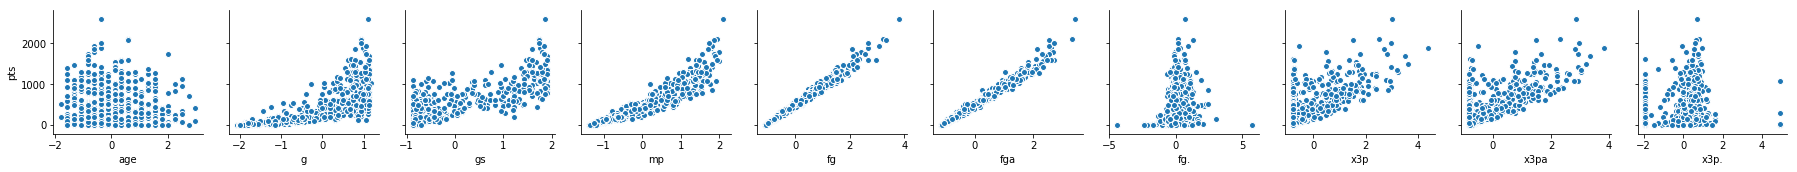

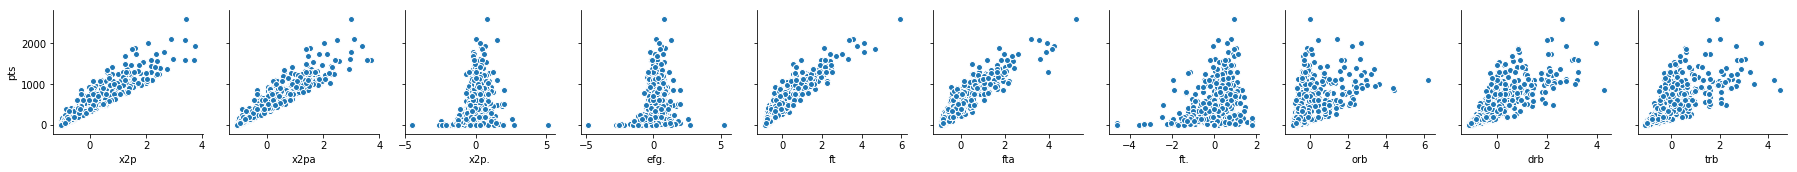

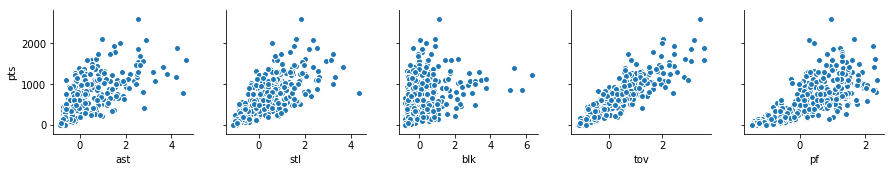

fg. x2p. efg.


In [7]:
X['pts'] = y
pp = sns.pairplot(data=X,y_vars=['pts'],x_vars=X.columns[:10])
plt.show()

pp = sns.pairplot(data=X,y_vars=['pts'],x_vars=X.columns[10:20])
plt.show()

pp = sns.pairplot(data=X,y_vars=['pts'],x_vars=X.columns[20:25])
plt.show()

print(X.columns[6], X.columns[12],X.columns[13])
X = X.drop(columns=['pts'],axis = 1)

We can eliminate features fg, x2p and efg due to low variance, if required

<h3>Training the Model (KNN Regression)</h3>

In [16]:
    
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

parameters = [{'weights': ['uniform'], 'n_neighbors': [5, 10, 20, 30, 40]}]
clf = GridSearchCV(KNeighborsRegressor(), parameters, scoring='neg_mean_squared_error')
clf.fit(X_train, y_train)

print("Best parameters are ",clf.best_params_)

knn = KNeighborsRegressor(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("KNN Regression Test Mean Squared Error: ",mean_squared_error(y_test, y_pred))

df = pd.DataFrame()
df['y_pred'] = y_pred[:5]
df['y_test'] = y_test[:5]
print(df)

Best parameters are  {'weights': 'uniform', 'n_neighbors': 5}
KNN Regression Test Mean Squared Error:  5737.25142857143
   y_pred  y_test
0   467.4     378
1    52.2      38
2   238.6     257
3   611.0     622
4   324.4     352
